# Final Project Submission

Please fill out:
* Student name: Omar Mustaf
* Student pace: full time
* Scheduled project review date/time: 09/07/2023
* Instructor name: Veronica Isiaho
* Blog post URL:

# PROJECT OVERVIEW

<font size='4'>The aim of this project is to assist DreamFlip Ventures, a house flipping company, in entering the real estate market of the northwestern county. The objective is to develop a statistical model that can effectively predict the market value of properties, enabling DreamFlip Ventures to make informed investment decisions and maximize their returns on investment.</font>

<img src="img\house_sale.jpg" alt="Image" width="800">


# Business Understanding

<font size='4'>In the context of house flipping, DreamFlip Ventures is looking to enter the real estate market of the northwestern county. Before initiating any house flipping projects in this area, DreamFlip Ventures needs to gain a comprehensive understanding of how to assess the profitability and potential returns on investment for properties in this area. This involves determining the key factors that influence the market value of a property, as well as identifying strategies to maximize returns.</font>

<font size='4'>To achieve these objectives, DreamFlip Ventures aims to develop a statistical model that effectively identifies relevant metrics and assesses their impact on property prices. By analyzing factors such as location, property condition, and other attributes, DreamFlip Ventures can make informed decisions regarding which properties to acquire, how to allocate resources for renovations, and how to strategically time the resale of flipped houses. This data-driven approach will help DreamFlip Ventures optimize their house flipping projects and maximize profitability in the competitive real estate market of northwestern county.</font>

# Data Understanding

### imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
import statsmodels.api as sm
from scipy import stats
import os


plt.style.use('fivethirtyeight')
save_folder = 'img' #creating folder
os.makedirs(save_folder, exist_ok=True)

warnings.filterwarnings('ignore')

### Data Source

<font size='3'>The dataset is sourced from the King County Department of Assessments and is publicly available for analysis. You can access the dataset from the following link: [King County House Sales Dataset](https://www.kingcounty.gov/depts/assessor/Reports/gis-salesresearch.aspx) </font>

### Loading Data

In [3]:
df = pd.read_csv('Data\k_house.csv')
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7729,3905080730,2/23/2015,535500.0,3,2.50,2050,4976,2.0,NO,NONE,...,8 Good,2050,0.0,1994,NaN,98029,47.5689,-121.995,2050,5153
3624,2568800121,9/11/2014,512500.0,4,1.75,1540,8311,1.0,NO,NONE,...,7 Average,1540,0.0,1950,0.0,98125,47.7046,-122.293,1890,7996
3275,2355010090,12/7/2014,843500.0,3,2.50,3560,11448,2.0,NO,NONE,...,11 Excellent,3560,0.0,1997,0.0,98052,47.7126,-122.104,3290,11506
10617,2581900036,6/12/2014,743000.0,3,1.75,2110,11250,1.0,NO,NONE,...,8 Good,2110,0.0,1961,0.0,98040,47.5402,-122.216,2560,10992
6781,6083000050,6/13/2014,235000.0,3,1.75,1900,8540,1.0,NaN,NONE,...,6 Low Average,950,950.0,1980,0.0,98168,47.4868,-122.303,1370,10204


In [4]:
# checking data size and shape
print(f'The Data has {df.shape[0]} rows and {df.shape[1]} columns')

The Data has 21597 rows and 21 columns


In [5]:
#checking for duplicates to avoid  overfitting
df.duplicated().value_counts()

False    21597
dtype: int64

In [6]:
# Checking the data info to see the data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# checking the data statistic to grasp more about the data eg minimum and mean
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# checking column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Data Limitation

#### Missing values

In [9]:
## Checking for missing values on each columns to view 
df.isna().mean()

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

#### Outliers

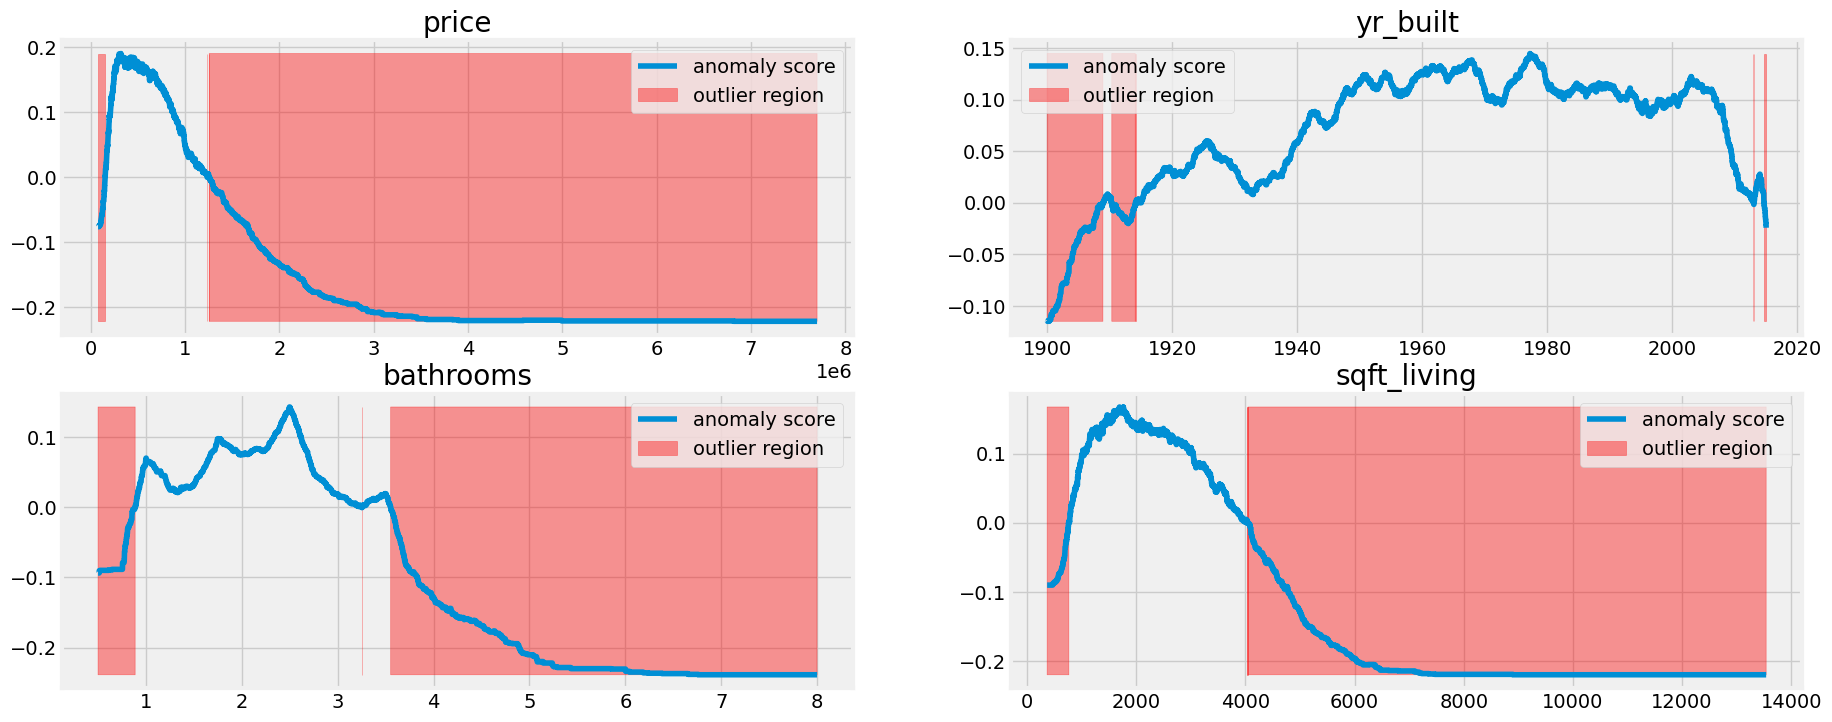

In [10]:
from sklearn.ensemble import IsolationForest
#The required columns
cols = ['price','yr_built','bathrooms','sqft_living']
#Plotting the sub plot
fig, axs = plt.subplots(2, 2, figsize=(20, 8), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination=0.05)
    isolation_forest.fit(df[column].values.reshape(-1,1))

    xx = np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

<font size='3'> The dataset exhibits several outliers that require attention. Typically, the majority of houses were built in the 1950s or later, with the exception of those constructed in 2020 and beyond. Moreover, properties with four or more bathrooms are considered outliers, while house prices  around 1.2 million and square feet of below 4000  appear to be the norm.
Handling outliers is crucial as they can adversely impact data analysis and modeling. To ensure robust results, it is imperative to address these outliers appropriately. By addressing the outliers, we can refine the dataset and improve the accuracy of any subsequent analysis or modeling.</font>

### Feature Inclusion

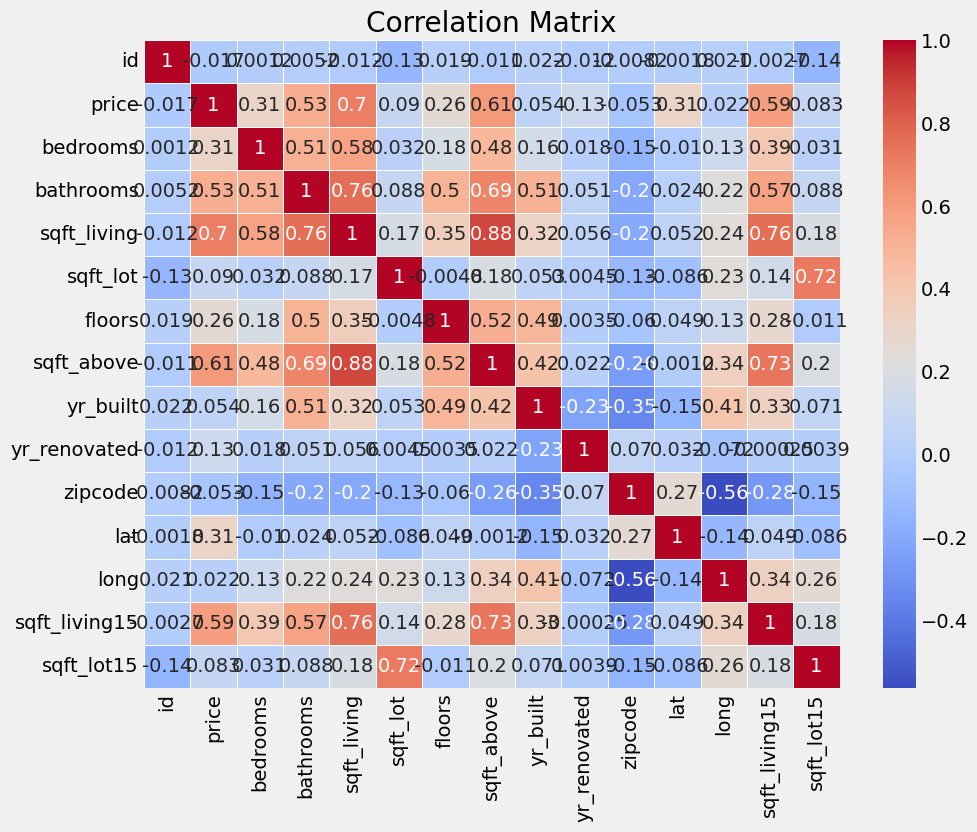

In [11]:
# checking for the feature correlation
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
## checking which features has high correlation to price in order to use them in our model
correlation_matrix['price'].sort_values(ascending=False)[1:]

sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

<font size='3'>Based on the analysis, it appears that the square footage of the living area, the number of bathrooms, and the number of bedrooms have higher correlations with the price. To improve the model accuracy, we can focus on selecting and including these features in our model.</font>

# Data Preparation

### Dealing with Missing Values

In [13]:
# checking missing values 
df.isna().mean()

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [14]:
# Replace '?' values with NaN
df['sqft_basement'].replace('?', np.nan, inplace=True)

# Convert column to floats
df['sqft_basement'] = df['sqft_basement'].astype(float)

# Replace NaN values with the mean of the column
df['sqft_basement'].fillna(df['sqft_basement'].mean(), inplace=True)

gradee = df.copy()

In [15]:
# Replaces grade strings with numerics based on data dict. 
grade_s = list(gradee['grade'].unique()) # list of unique values from column
grade_n = [int(x.split()[0]) for x in list(gradee['grade'].unique())] # list of corresponding integer type values

# replaces a cell value with the int of the first character of its existing string
gradee.replace(to_replace=grade_s,value=grade_n,inplace=True)

In [16]:
# replace yr_built NaNs with numeric 0
df['yr_renovated'].replace(to_replace=np.nan,value=0,inplace=True)

In [17]:
# convert waterfront into numeric boolean and change the nan to 0
waterfront_dict = {'YES':1,'NO':0,np.nan:0}
df.waterfront.replace(to_replace=waterfront_dict,inplace=True)

In [18]:
# convert view from string into categorical ordinal
view_dict = {np.nan:0,'NONE':0,'FAIR':1,'AVERAGE':2,'GOOD':3,'EXCELLENT':4}
df.view.replace(to_replace=view_dict,inplace=True)

In [19]:
# the bathroom data seem to have floats eg 2.5 which is not possible hence we round to the nearest number
df['bathrooms'] =df['bathrooms'].apply(lambda x: np.ceil(x))

In [20]:
# Dictionary with zipcodes associated with waterfronts described by the data dictionary
water_location = {'Duwamish':[98168],
'Elliott Bay':[98119,98104,98129,98132,98127,98125,98195,98101,98134,98170,98139,98131,98181], 
'Puget Sound':[98071,98083,98013,98070,98031,98131,98063,98195,98207,98190], 
'Lake Union':[98109], 
'Ship Canal':[00000], 
'Lake Washington':[98072,98077], 
'Lake Sammamish':[98074,98075,98029], 
'other lake':[00000], 
'river/slough waterfronts':[00000]}

# list to contain new column data
waterfront_list = []

# for loop to assign waterfront based on zipcode
for zipcode in df.zipcode:
    for k,v in water_location.items():
        if zipcode in v:
            waterfront_list.append(k)
            appended = True
            break
        else: 
            appended = False
    if not appended:
        waterfront_list.append('NONE')


df['waterfront_loc'] = waterfront_list

# one-hot encoding waterfront_loc
waterfront_dummies = pd.get_dummies(df.waterfront_loc,prefix='waterfront',prefix_sep='_').drop('waterfront_NONE',axis=1)
df = pd.concat([df,waterfront_dummies],axis=1)

# zipcode has now be interpolated into waterfront_loc, waterfront_loc is now one-hot encoded and it is all string types
# so it is not able to be passed into the regression model 
df = df.drop(['zipcode','waterfront_loc'],axis=1) 


### Outliers

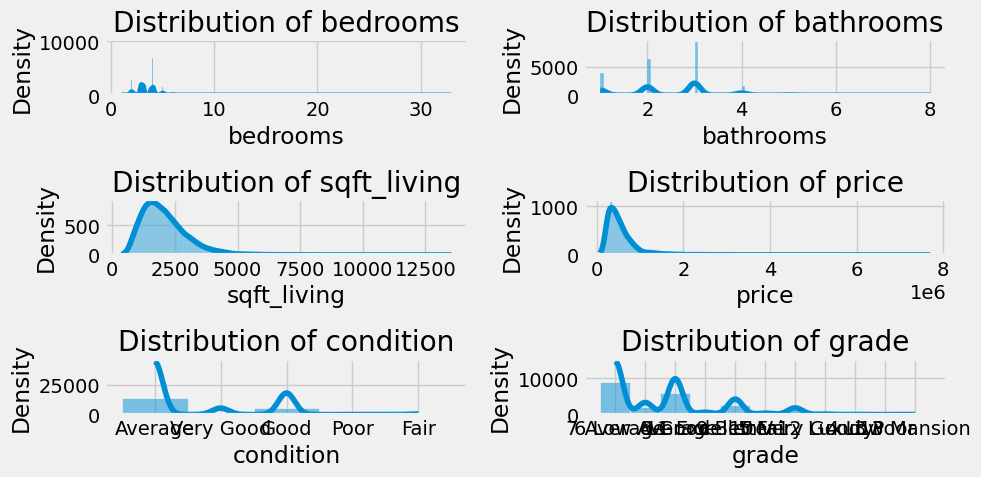

In [21]:
## checking the distribution of some column to look for outliers

columns_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'price','condition','grade']

fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(10,5))

for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import numpy as np

def remove_outliers_robust(df, columns, threshold=3):
    
    df_outliers_removed = df.copy()
    
    for column in columns:
        # Calculate the median and median absolute deviation (MAD)
        median = df_outliers_removed[column].median()
        mad = np.median(np.abs(df_outliers_removed[column] - median))
        
        # Identify outlier indices based on the threshold
        outlier_indices = np.abs(df_outliers_removed[column] - median) / mad > threshold
        
        # Replace outliers with NaN
        df_outliers_removed.loc[outlier_indices, column] = np.nan
    
    # Drop rows with NaN values
    df_outliers_removed.dropna(inplace=True)
    
    return df_outliers_removed


In [23]:
before_p = df['price'].copy()
columns_to_remove_outliers = ['bedrooms', 'bathrooms', 'sqft_living', 'price']
df= remove_outliers_robust(df, columns_to_remove_outliers)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,waterfront_Duwamish,waterfront_Elliott Bay,waterfront_Lake Sammamish,waterfront_Lake Union,waterfront_Lake Washington,waterfront_Puget Sound
0,7129300520,10/13/2014,221900.0,3.0,1.0,1180.0,5650,1.0,0.0,0,...,47.5112,-122.257,1340,5650,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3.0,3.0,2570.0,7242,2.0,0.0,0,...,47.7210,-122.319,1690,7639,0,1,0,0,0,0
2,5631500400,2/25/2015,180000.0,2.0,1.0,770.0,10000,1.0,0.0,0,...,47.7379,-122.233,2720,8062,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4.0,3.0,1960.0,5000,1.0,0.0,0,...,47.5208,-122.393,1360,5000,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3.0,2.0,1680.0,8080,1.0,0.0,0,...,47.6168,-122.045,1800,7503,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3.0,3.0,1530.0,1131,3.0,0.0,0,...,47.6993,-122.346,1530,1509,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4.0,3.0,2310.0,5813,2.0,0.0,0,...,47.5107,-122.362,1830,7200,0,0,0,0,0,0
21594,1523300141,6/23/2014,402101.0,2.0,1.0,1020.0,1350,2.0,0.0,0,...,47.5944,-122.299,1020,2007,0,0,0,0,0,0
21595,291310100,1/16/2015,400000.0,3.0,3.0,1600.0,2388,2.0,0.0,0,...,47.5345,-122.069,1410,1287,0,0,0,0,0,0


### Encoding

In [24]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create 'season' feature based on 'date'
df['season'] = df['date'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

# Create dummy variables for 'season'
season_dummies = pd.get_dummies(df['season'],drop_first=True,prefix='season')

# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, season_dummies], axis=1)

# Drop the 'season' column if desired
df = df.drop('season', axis=1)

df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,waterfront_Duwamish,waterfront_Elliott Bay,waterfront_Lake Sammamish,waterfront_Lake Union,waterfront_Lake Washington,waterfront_Puget Sound,season_Spring,season_Summer,season_Winter
0,7129300520,2014-10-13,221900.0,3.0,1.0,1180.0,5650,1.0,0.0,0,...,5650,0,0,0,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3.0,3.0,2570.0,7242,2.0,0.0,0,...,7639,0,1,0,0,0,0,0,0,1
2,5631500400,2015-02-25,180000.0,2.0,1.0,770.0,10000,1.0,0.0,0,...,8062,0,0,0,0,0,0,0,0,1
3,2487200875,2014-12-09,604000.0,4.0,3.0,1960.0,5000,1.0,0.0,0,...,5000,0,0,0,0,0,0,0,0,1
4,1954400510,2015-02-18,510000.0,3.0,2.0,1680.0,8080,1.0,0.0,0,...,7503,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3.0,3.0,1530.0,1131,3.0,0.0,0,...,1509,0,0,0,0,0,0,1,0,0
21593,6600060120,2015-02-23,400000.0,4.0,3.0,2310.0,5813,2.0,0.0,0,...,7200,0,0,0,0,0,0,0,0,1
21594,1523300141,2014-06-23,402101.0,2.0,1.0,1020.0,1350,2.0,0.0,0,...,2007,0,0,0,0,0,0,0,1,0
21595,291310100,2015-01-16,400000.0,3.0,3.0,1600.0,2388,2.0,0.0,0,...,1287,0,0,0,0,0,0,0,0,1


In [25]:
# Perform one-hot encoding using get_dummies
condition_dummies = pd.get_dummies(df['condition'],drop_first=True ,prefix='condition')

# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, condition_dummies], axis=1)

# Drop the original 'condition' column if desired
df = df.drop('condition', axis=1)


# Perform one-hot encoding using get_dummies
grade_dummies = pd.get_dummies(df['grade'],drop_first=True ,prefix='grade')

# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, grade_dummies], axis=1)



In [26]:
# dropping this column because they are not desired in our model
df.drop(['id','date'],axis=1,inplace=True)

### Transformation

In [27]:
y_log = np.log(df['price'])

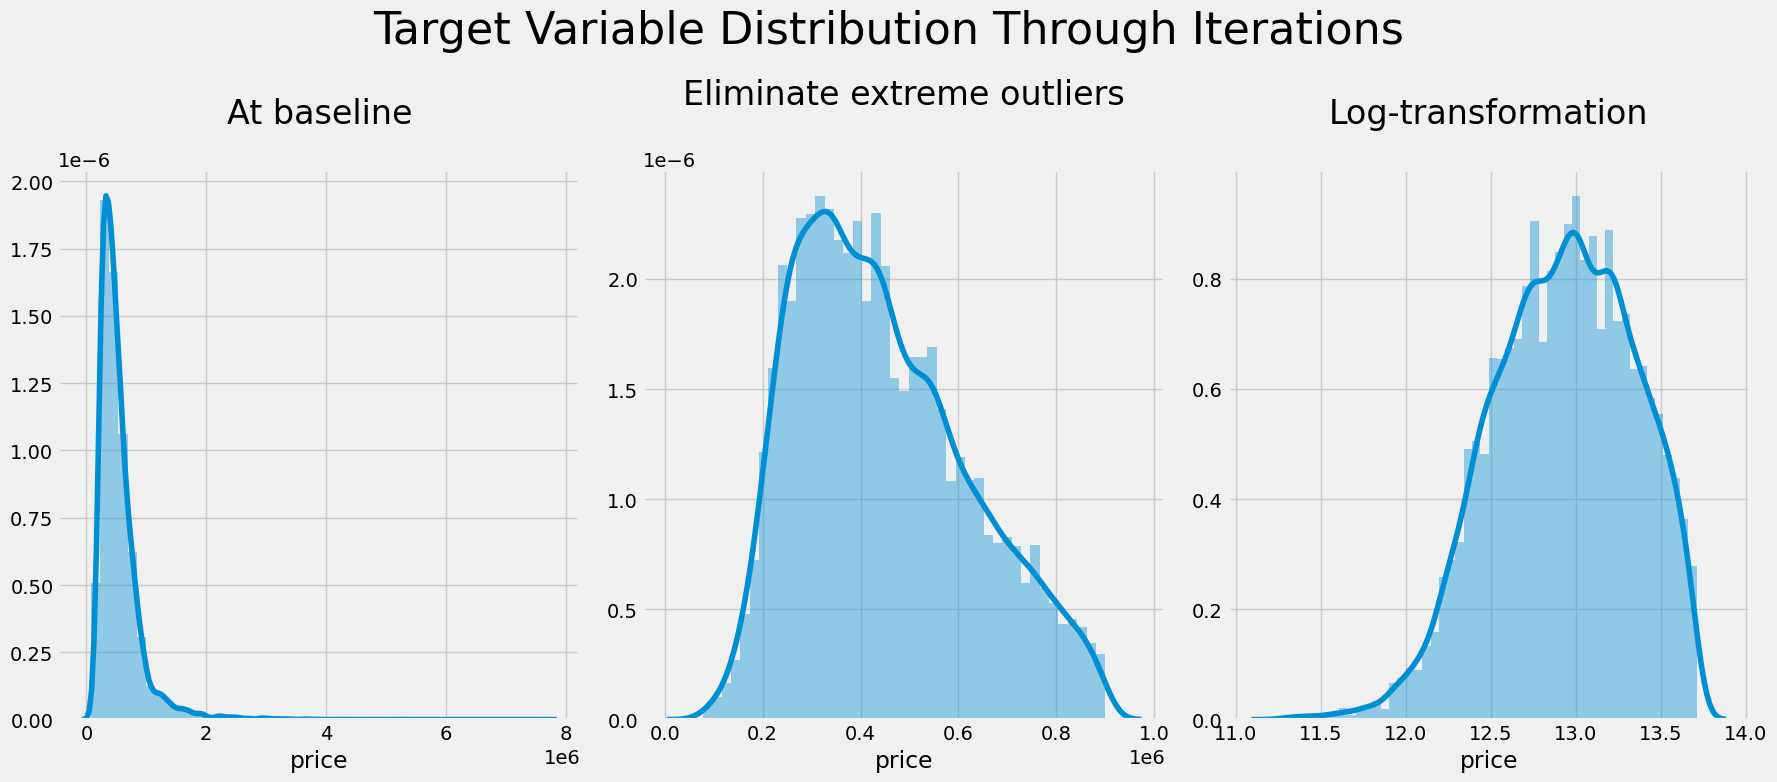

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

og = sns.distplot(before_p,ax=ax1).set_title('At baseline\n',fontsize=24)
ot = sns.distplot(df.price,ax=ax2).set_title('Eliminate extreme outliers\n',fontsize=24)
lo = sns.distplot(y_log,ax=ax3).set_title('Log-transformation\n',fontsize=24)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")


plt.gcf().set_size_inches(18, 8)
plt.suptitle("Target Variable Distribution Through Iterations",fontsize=32)
fig.tight_layout()
plt.show()

<font size='3'>Using a box plot before and after a log transformation helps visualize the impact of the transformation on the target variable's distribution. The first plot shows the original distribution, while the second plot displays the transformed distribution. Comparing the two plots reveals the effectiveness of the transformation in achieving a more symmetric distribution and reducing outliers.</font>

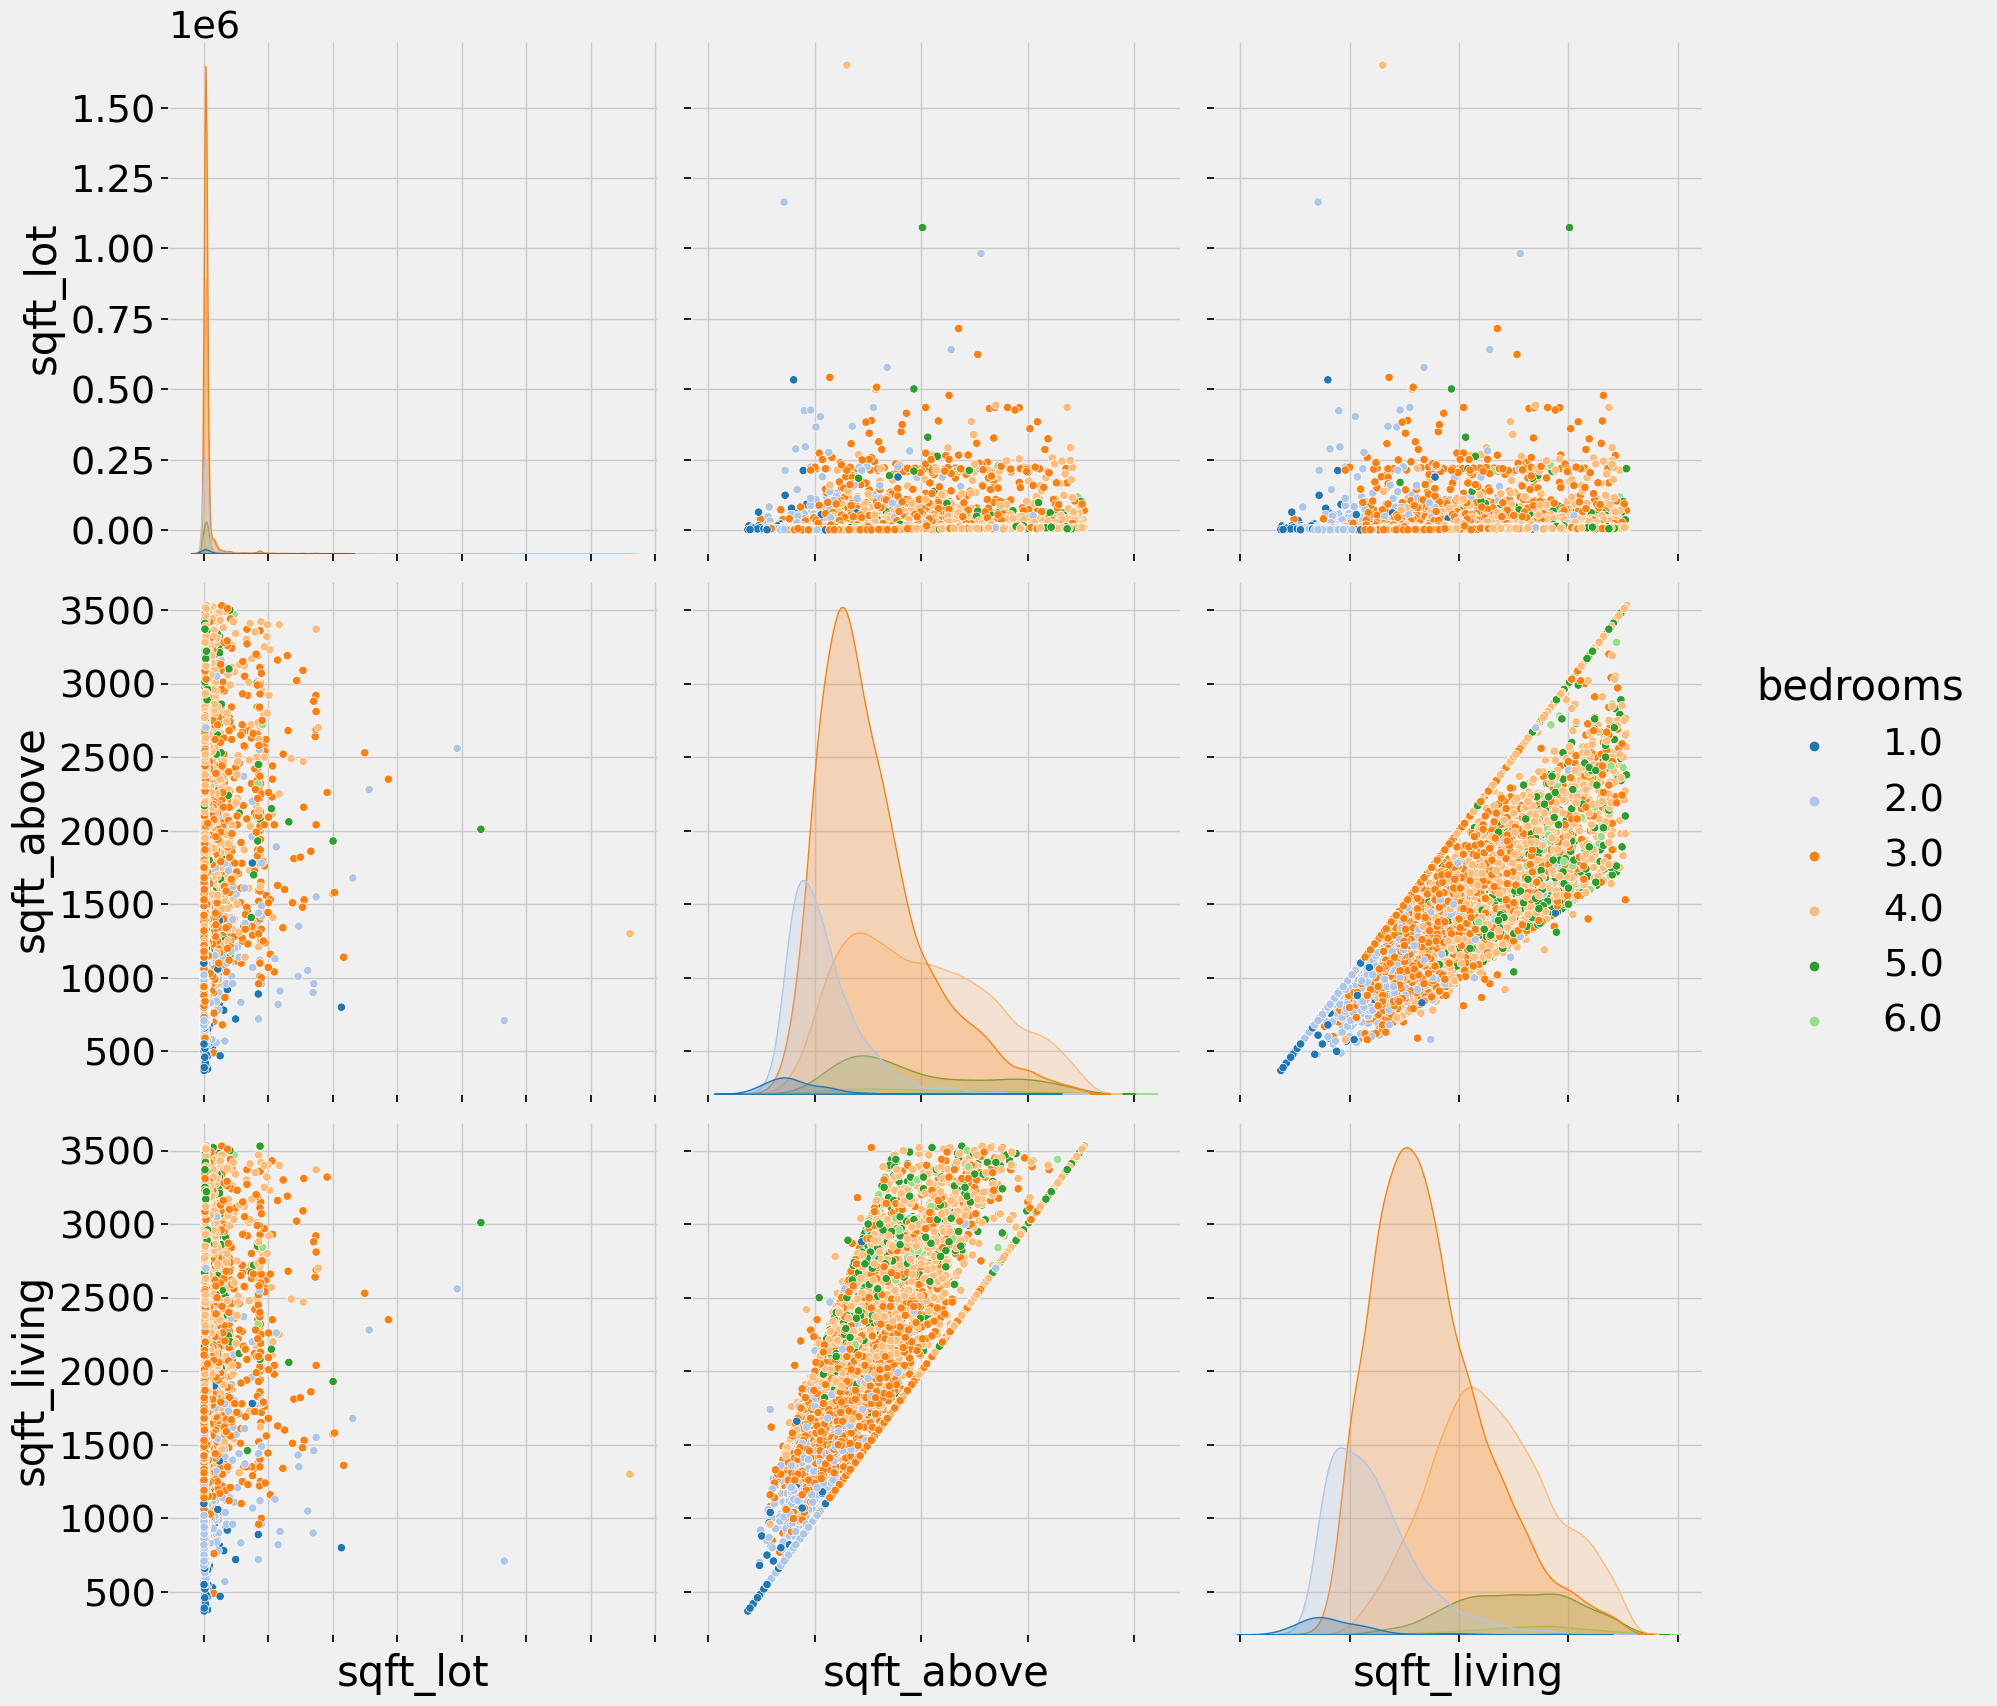

In [29]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df[['sqft_lot','sqft_above','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

# Model

In [30]:
# creating the baseline with best correlating features to improve on
y = df['price']
X = df[['sqft_living','bathrooms']]

In [66]:
X = sm.add_constant(X)
#baseline linear regression model
baseline_model = sm.OLS(y, X)
baseline_results = baseline_model.fit()

# Print the summary of the baseline model
print(baseline_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     4113.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:26:46   Log-Likelihood:            -2.5330e+05
No. Observations:               19017   AIC:                         5.066e+05
Df Residuals:                   19014   BIC:                         5.066e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.67e+05   3465.200     48.185      

<font size='3'>The baseline linear model explains 30.2% of the housing price variability using two predictors: sqft_living and bathrooms. Each additional square foot of living area is associated with a $148 increase in price. The number of bathrooms does not significantly impact prices. The model is statistically significant (F-statistic = 4074) but has potential issues with non-normality of errors.. We can improve this model by adding more features.</font>

In [71]:
# create the improved model with many features to answer questions about the project
feature_list = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view','yr_built', 'yr_renovated', 'lat', 'long', 'waterfront_Duwamish', 'waterfront_Elliott Bay','waterfront_Lake Sammamish', 'waterfront_Lake Union','waterfront_Lake Washington', 'waterfront_Puget Sound', 'season_Spring','season_Summer', 'season_Winter', 'condition_Fair', 'condition_Good','condition_Poor', 'condition_Very Good', 'grade_11 Excellent','grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average','grade_7 Average', 'grade_8 Good', 'grade_9 Better']
xxx = df[feature_list]
model = sm.OLS(y_log,sm.add_constant(xxx))
model_s = model.fit()
model_s.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:27:39   Log-Likelihood:                 899.00
No. Observations:               19017   AIC:                            -1732.
Df Residuals:                   18984   BIC:                            -1473.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -41.3844      1.898    -21.804      0.000     -45.105     -37.664
bedrooms                      -0.0208      0.003     -7.963      0.000      -0.026      -0.016
bathrooms                      0.0388      0.003     11.378      0.000       0.032       0.046
sqft_living                    0.0002   4.63e-06     45.264      0.000       0.000       0.000
sqft_lot                    7.099e-07   4.87e-08     14.568      0.000    6.14e-07    8.05e-07
floors                         0.0553      0.004     13.586      0.000       0.047       0.063
waterfront                     0.3104      0.039      8.048      0.000       0.235       0.386
view                           0.0598      0.003     19.040      0.000       0.054       0.066
yr_built                      -0.0031   9.34e-05    -33.017      0.000      -0.003      -0.003
yr_renovated                1.782e-05   5.25e-06      3.393      0.001    7.52e-06    2.81e-05
lat                            1.3475      0.013    103.318      0.000       1.322       1.373
long                           0.0322      0.014      2.232      0.026       0.004       0.060
waterfront_Duwamish           -0.2550      0.014    -17.622      0.000      -0.283      -0.227
waterfront_Elliott Bay        -0.0255      0.010     -2.429      0.015      -0.046      -0.005
waterfront_Lake Sammamish      0.1090      0.009     12.723      0.000       0.092       0.126
waterfront_Lake Union          0.2559      0.027      9.456      0.000       0.203       0.309
waterfront_Lake Washington    -0.1871      0.012    -15.131      0.000      -0.211      -0.163
waterfront_Puget Sound        -0.0477      0.012     -3.876      0.000      -0.072      -0.024
season_Spring                  0.0465      0.005     10.068      0.000       0.037       0.056
season_Summer                  0.0078      0.005      1.681      0.093      -0.001       0.017
season_Winter                  0.0005      0.005      0.094      0.925      -0.010       0.011
condition_Fair                -0.1342      0.018     -7.317      0.000      -0.170      -0.098
condition_Good                 0.0525      0.004     12.517      0.000       0.044       0.061
condition_Poor                -0.1958      0.044     -4.441      0.000      -0.282      -0.109
condition_Very Good            0.1061      0.007     15.441      0.000       0.093       0.120
grade_11 Excellent             0.0508      0.046      1.103      0.270      -0.039       0.141
grade_3 Poor                  -0.1984      0.232     -0.856      0.392      -0.653       0.256
grade_4 Low                   -0.7895      0.047    -16.769      0.000      -0.882      -0.697
grade_5 Fair                  -0.7010      0.021    -33.341      0.000      -0.742      -0.660
grade_6 Low Average           -0.5457      

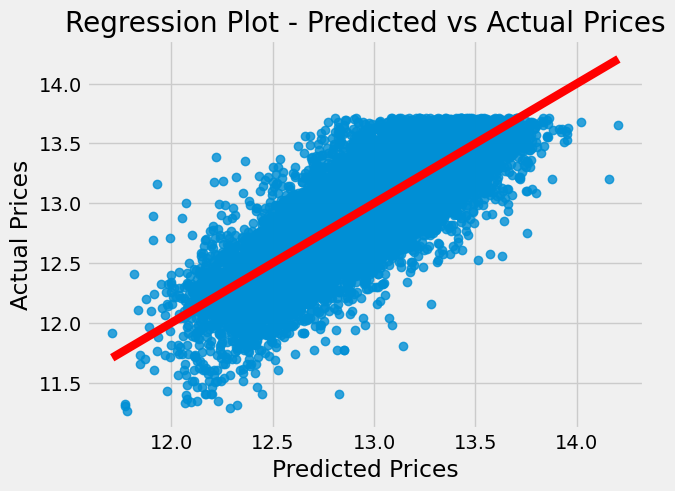

In [67]:
# Create a DataFrame with the selected features
xxx = df[feature_list]

# Fit the OLS model
model = sm.OLS(y_log, sm.add_constant(xxx))
model_s = model.fit()

# Create a DataFrame with the predicted and actual values
df_results = pd.DataFrame({'Predicted': model_s.predict(), 'Actual': y_log})

# Plot the regression line
sns.regplot(x='Predicted', y='Actual', data=df_results, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Regression Plot - Predicted vs Actual Prices')

# Display the plot
plt.show()


<font size='4'> the predicted vs actual plot provides a visual representation of the model's performance in predicting house prices. It helps assess the accuracy and reliability of the model's predictions by comparing them to the actual prices observed in the dataset.</font>

### Model Residual Distribution

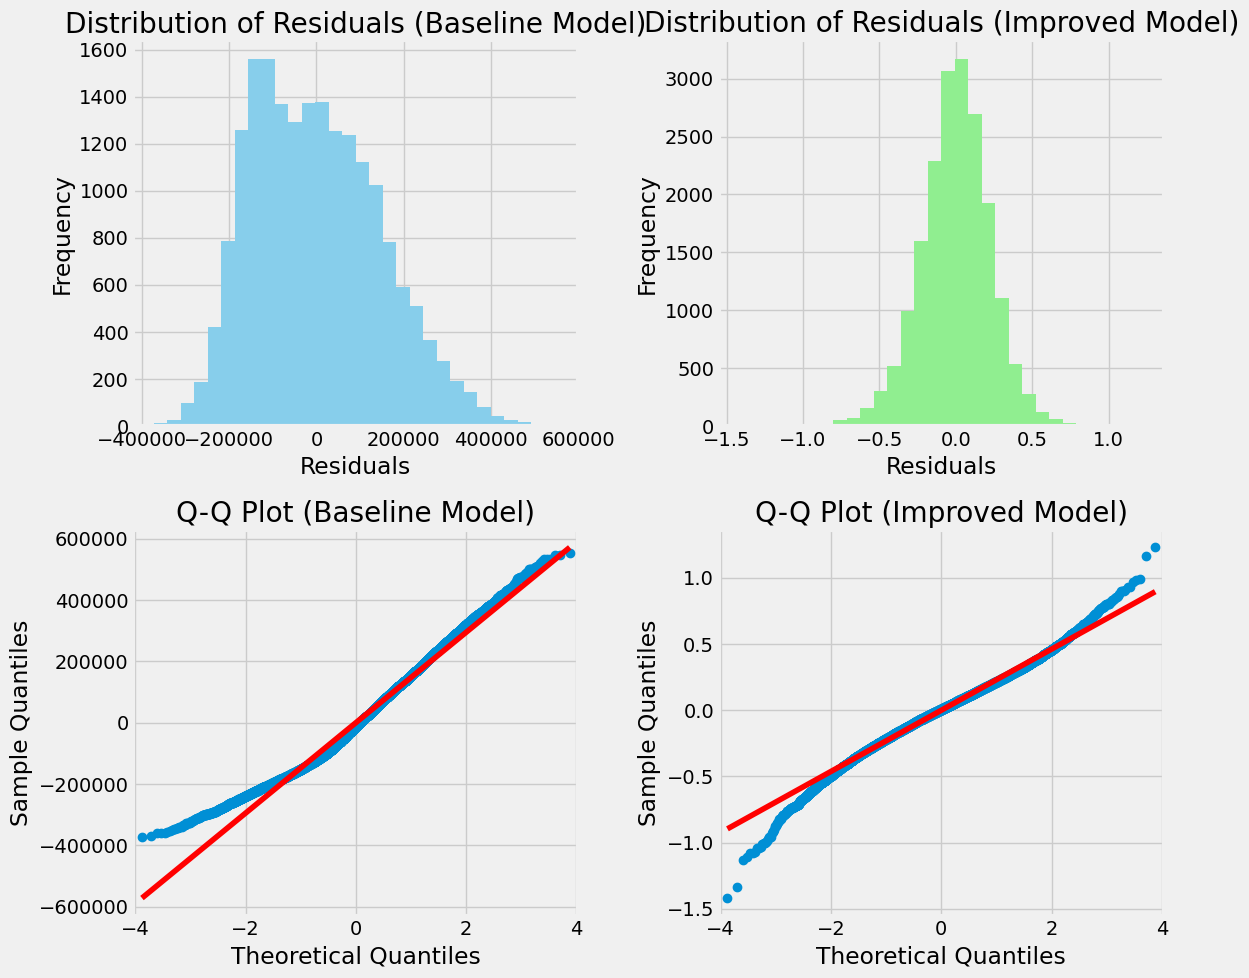

In [33]:
# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the distribution of residuals for the baseline model
axs[0, 0].hist(baseline_results.resid, bins=30, color='skyblue')
axs[0, 0].set_xlabel('Residuals')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of Residuals (Baseline Model)')
axs[0, 0].grid(True)

# Plot the distribution of residuals for the improved model
axs[0, 1].hist(model_s.resid, bins=30, color='lightgreen')
axs[0, 1].set_xlabel('Residuals')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of Residuals (Improved Model)')
axs[0, 1].grid(True)

# Q-Q plot for the baseline model
sm.qqplot(baseline_results.resid, line='s', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot (Baseline Model)')
axs[1, 0].grid(True)

# Q-Q plot for the improved model
sm.qqplot(model_s.resid, line='s', ax=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot (Improved Model)')
axs[1, 1].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


<font size='4'>In summary, the improved model demonstrates enhancements in the distribution of residuals, indicating a closer approximation to normality compared to the baseline model. The Q-Q plots further support this improvement, showing a better fit to the expected diagonal line. These findings suggest that the improved model is better suited for making accurate predictions and reliable statistical inferences.</font>

## Regression Result

<font size='4'>Based on the model summary it shows that it is better than the baseline model with an increase of 40% in R-squared, this regression model is robust and reliable, satisfying key assumptions of linear regression. The residuals exhibit a strong resemblance to the t-distribution, indicating normality. The Durbin-Watson score confirms homoscedasticity. The model's linearity is supported by the iterative development process. The condition number suggests effective management of multicollinearity. The Jarque-Bera test reinforces the model's adherence to normality. Although kurtosis deviates slightly, it represents the lowest deviation among iterations. These findings validate the model's strength and reliability.</font>


<font size='4'>The regression analysis reveals two features that exhibit strong relationships with property sale prices: the number of bathrooms and the waterfront location.</font>

<font size='4'>Interpretation of Coefficients:
The number of bathrooms has a significant positive impact on property prices. For each additional bathroom, the model predicts a price increase of approximately 4.00%. This implies that properties with more bathrooms tend to command higher sale prices, likely because they offer greater convenience and comfort to potential buyers.</font>

<font size='4'>Moreover, the specific waterfront location of Lake Union stands out as the most favorable for property prices. Properties located on the Lake Union waterfront experience the highest price increase among the various waterfront locations analyzed, with a predicted increase of approximately 25.25%. This finding highlights the exceptional appeal and desirability of Lake Union as a prime waterfront location in the King County real estate market.</font>

<font size='4'>Implications for the Real-World Problem:
These findings have significant implications for DreamFlip Ventures' investment decisions in the King County real estate market. By prioritizing properties with a higher number of bathrooms and specifically focusing on those located on the Lake Union waterfront, stakeholders can strategically identify properties with the highest potential for profitability.</font>

## Actions for Stakeholders

### Where?

<font size='4'>1. Capitalize on Lake Union waterfront properties: Stakeholders should actively seek out properties located on the Lake Union waterfront, as they offer the greatest price advantage among waterfront locations. Investing in Lake Union waterfront properties can provide a competitive edge and potentially yield higher returns on investment.</font>

In [34]:
import time # used to sleep before saving this image
import folium
# Filter the DataFrame for properties on Lake Union
lake_union_properties = df[df['waterfront_Lake Union'] == 1][['lat', 'long']]

# Create a Folium map centered around Lake Union
lake_union_map = folium.Map(location=[47.6477, -122.3344], zoom_start=13)

# Add circles for each property on Lake Union to the map
for index, row in lake_union_properties.iterrows():
    folium.Circle(
        location=[row['lat'], row['long']],
        radius=50,  
        color='green',
        fill=True,
        fill_color='blue'
    ).add_to(lake_union_map)

# Display the map
lake_union_map

### What?

<font size='4'>2.DreamFlip Ventures can enhance property value by adding one or two bathrooms through strategic renovations. Additionally, investing in houses with poor condition and lower grades offers a lucrative opportunity for increasing market value. By renovating these properties, DreamFlip Ventures can maximize profitability. Thorough market research, property evaluations, and strategic renovations are key to success in the real estate market..</font>

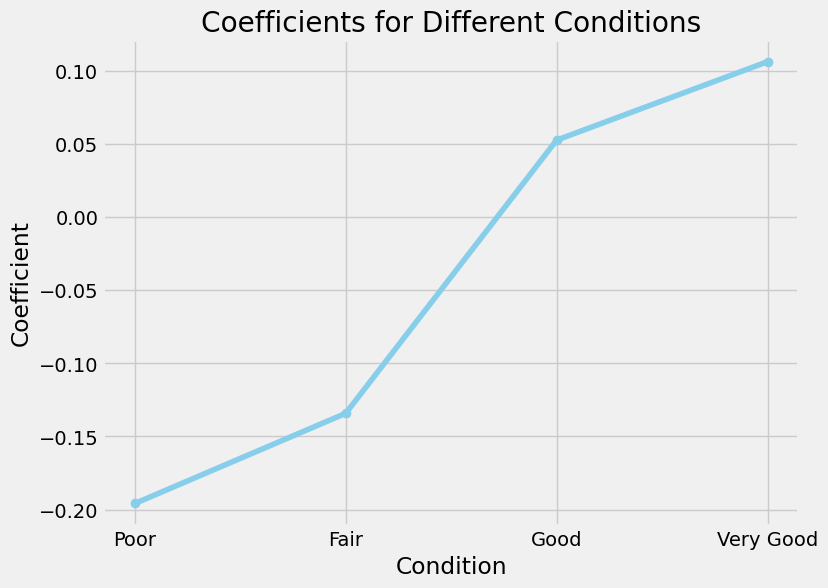

In [65]:
# Define the conditions
conditions = ['Poor', 'Fair', 'Good', 'Very Good']

# Define the coefficients
coefficients = [ -0.1958,-0.1342, 0.0525, 0.1061]

# Plot the coefficients
plt.figure(figsize=(8, 6))
plt.plot(conditions, coefficients, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Condition')
plt.ylabel('Coefficient')
plt.title('Coefficients for Different Conditions')
plt.grid(True)
plt.show()

### When?

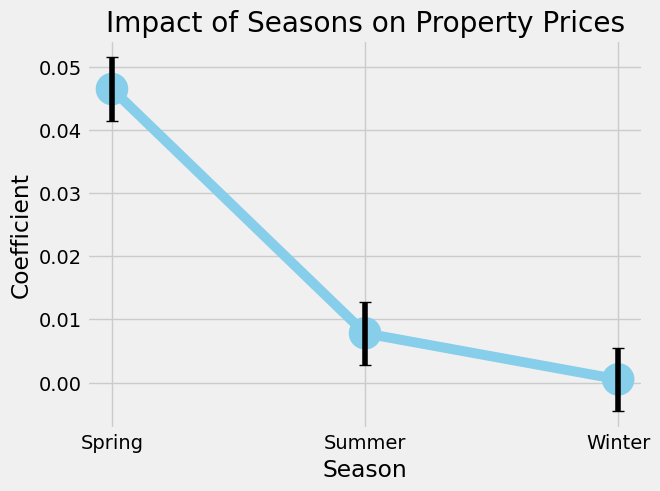

<Figure size 640x480 with 0 Axes>

In [36]:
# Data
seasons = ['Spring', 'Summer', 'Winter']
coefficients = [0.0465, 0.0078, 0.0005]
errors = [0.005, 0.005, 0.005]

# Create a dataframe
data = {'Season': seasons, 'Coefficient': coefficients, 'Error': errors}
df1 = pd.DataFrame(data)

# Plotting the coefficients with error bars
sns.pointplot(x='Season', y='Coefficient', data=df1, color='skyblue')
plt.errorbar(range(len(seasons)), coefficients, yerr=errors, fmt='none', color='black', capsize=4)
plt.xlabel('Season')
plt.ylabel('Coefficient')
plt.title('Impact of Seasons on Property Prices')
plt.grid(True)

# Display the plot
plt.show()
file_path = os.path.join(save_folder, 'time.png')
plt.savefig(file_path)


<font size='4'>3.The model suggests that spring, with its favorable market conditions and increased buyer activity, could be a good season for selling properties in Lake Union to maximize ROI</font>


# Next step

<font size='4'>It is worth one-hot encoding some of the other categorical features such as view. Also, investigating eliminating outliers based on category (e.g. there are only 27 data points with a grade of 4, and only 1 with a grade of 3 or less.). Some of the leptokurtosis may be addressed by continuing to eliminate outliers using this method.</font>

## Conclusion

<font size='4'>
DreamFlip Ventures should consider investing in houses with poor conditions in the King County real estate market. By renovating and improving these properties, such as by adding one or two bathrooms, they can increase their value and appeal to potential buyers. Additionally, focusing on properties located in Lake Union offers strong investment potential due to the area's desirability and higher sale prices. Spring, with its favorable market conditions and increased buyer activity, could be a good season for purchasing properties in Lake Union. Continuous market monitoring and thorough property evaluations are essential for making successful investment decisions.</font>